### Import relevant modules
`WaveformSilhouette` and `LinearEncoding` are defined in `silhouette.py`

In [1]:
import torch
import torchaudio
import torch.nn.functional as F


%matplotlib inline
import matplotlib.pyplot as plt

from silhouette import WaveformSilhouette, LinearEncoding

### Load waveform data
In this example we only load a single waveform with shape `[C x T]`, but usually in training we load a batch with shape `[B x C x T]`

In [2]:
waveform, sample_rate = torchaudio.load('p270_163.wav')
print(f"Sample Rate: {sample_rate} | Waveform Shape: {waveform.shape}")

Sample Rate: 22050 | Waveform Shape: torch.Size([1, 78278])


### Extract Silhouette
`WaveformSilhouette` is implement in a similar manner like other Transform module from torchaudio (e.g., `Spectrogram`) 

Shape: torch.Size([2, 305])


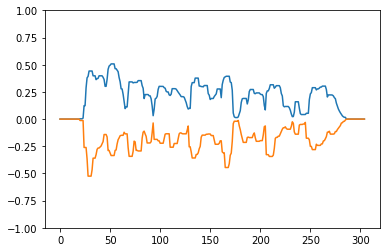

In [3]:
win_length = 1024
hop_length = 256
transform = WaveformSilhouette(win_length, hop_length)
silh = transform(waveform)

print(f"Shape: {silh.shape}")
plt.plot(silh[0,:])
plt.plot(silh[1,:])
plt.ylim([-1.0,1.0])
plt.show()

### Quantization
Waveform Silhouette is a two-dimensional continuous values we want to quantize them into discrete value using either linear or mulaw encoding.

Shape: torch.Size([2, 305])


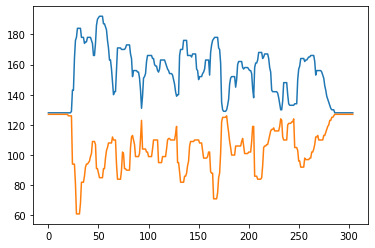

Shape: torch.Size([2, 305])


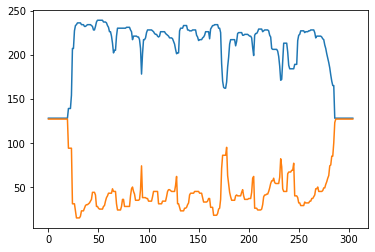

Shape: torch.Size([2, 305])


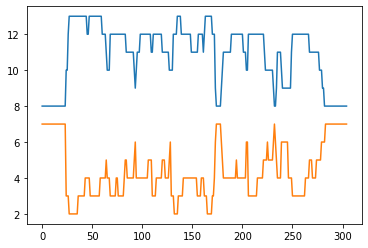

In [4]:
quantizers = [
    LinearEncoding(quantization_channels=256),
    torchaudio.transforms.MuLawEncoding(quantization_channels=256),
    torchaudio.transforms.MuLawEncoding(quantization_channels=16),
]

for quantizer in quantizers:
    silh_quan = quantizer(silh)
    print(f"Shape: {silh_quan.shape}")
    plt.plot(silh_quan[0,:])
    plt.plot(silh_quan[1,:])
    plt.show()



### Embedding
We convert discrete (`Long`) value into One-hot Vector and use it as feature input.

In [5]:
C, T = silh_quan.shape

feat = torch.flatten(torch.transpose(silh_quan,0,1))
feat = F.one_hot(feat, num_classes=16)
feat = torch.transpose(feat.reshape(T,C*16),0,1)

print(f"Shape: {feat.shape}")
print(f"Frame Example: {feat[:,1]}")

Shape: torch.Size([32, 305])
Frame Example: tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0])


### End.